# Ling 165 Lab 6: CFGs and CYK parser

The notebook recaps encoding of grammar using **context free** rules, or **context free grammmars (CFGs)**. If we have a yield of the applied rules of a CFG grammar, the order of the rules can be re-constructed via _parsing_ the sequence, and a **CYK parser** (Cocke, Younger and Kasami) is a parser efficiently assigning structures to sentences. Additionally, we discuss complexity characterization of algorithms in terms of **Big O notation**.

## Formal languages hierarchy: reminder

Several weeks ago, we discussed the nested hierarchy of formal languages aligned with respect to their complexities: **the Chomsky hierarchy**.


Earlier in this class, we discussed two of those classes:

  * **Regular languages:** sets of strings that are generated by some regular expression or finite state automaton;
  * **Finite languages:** languages strings of which can be listed (i.e. non-infinite languages).

## Context Free Grammars (CFGs)

You've probably seen phrase structure grammars written as a list of re-write rules:

  * S $\rightarrow$ NP VP;
  * NP $\rightarrow$ D N;
  * D $\rightarrow$ _the;_
  * N $\rightarrow$ _apple_...
  
Rules of such shape are also known as **context-free rules**. These rules are _replacement_ rules, and their shape can be one of the followings:
  * _one-to-many_ (i.e. A $\rightarrow$ B C, A $\rightarrow$ B C D);
  * _one-to-one_ (i.e. A $\rightarrow$ B);
  * _one-to-zero_ (i.e. A $\rightarrow$ $\epsilon$);

CFGs are more powerful than regular languages. For example, earlier we saw that it is not possible to get patterns of the type $a^nb^n$ using regular languages. CFGs can easily handle patterns like that.

**Example.** Consider the following CFG.
  * S $\rightarrow$ A S B;
  * A $\rightarrow$ a;
  * B $\rightarrow$ b;
  * S $\rightarrow$ $\epsilon$.
  
This grammar can generate strings from the language $a^nb^n$: ab, aabb, etc.

### Question 1
You are given the following CFG.

  * S $\rightarrow$ A S;
  * A $\rightarrow$ A A;
  * A $\rightarrow$ b c;
  * A $\rightarrow$ b;
  * S $\rightarrow$ c d;
  * S $\rightarrow$ d;
  
Assign all possible parses to a string $bcbcd$. Write the rules in order (you might find it helpful to make a tree)

**ANS**: 

S → A S  
A → b c  
S → A S     
A → b  
S → c d

S → A S  
S → c d  
A → A A  
A → b c  
A → b

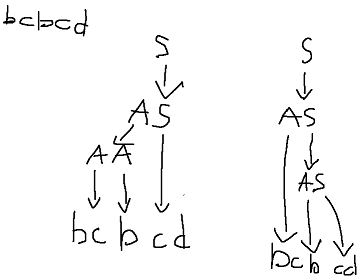

### Chomsky normal form (CNF)

There are two types of symbols in CFG rules: terminals and non-terminals.
**Terminal symbols** are ones that can only appear as leaf nodes; so, for language-related grammars, those are lexical items.
**Non-terminal symbols** cannot appear as leaf nodes; they can be viewed as part of speech, or phrasal categories.
_No symbol can be terminal and non-terminal at the same time._
When working with abstract alphabets, usually terminal symbols are the lowercase letters, and the non-terminal ones are uppercase.

One of the frequent reasons to employ CFGs is to parse through [XML (Extensible Markup Language)](https://en.wikipedia.org/wiki/XML) files, design communication protocols, and even compile programming languages. In computer science, a frequent way of restricting the shape of CFGs is the [Backus-Naur form](https://en.wikipedia.org/wiki/Backus%E2%80%93Naur_form).

In formal lingusitics, however, the standard shape of the CFG is the [Chomsky Normal Form (CNF)](https://en.wikipedia.org/wiki/Chomsky_normal_form).
The rules below describe the CNF, where $A$, $B$ and $C$ are the non-terminal symbols and $a$ is the terminal one.

  * All rules must be of one of the following types:
    * A $\rightarrow$ B C;
    * A $\rightarrow$ a;
    * A $\rightarrow$ $\epsilon$, and
  * There should be a unique starting symbol.
  

Any CFG can be represented in CNF, and there is a [conversion algorithm](https://en.wikipedia.org/wiki/Chomsky_normal_form#Converting_a_grammar_to_Chomsky_normal_form) that does it.

### Question 2
Rewrite the grammar from question 1 in CNF.

So CNF is basically a symbol cannot be both terminal and non-terminal

S → A S | C D | D  
A → A A | B C | B  
B → b  
C → c  
D → d

## CYK algorithm

**CYK parsing algorithm** starts by constructing a table in which it stores intermediate parsing decisions. Importantly, CYK only operates on grammars given in CNF.


    Given:   a sequence of the length N that needs to be parsed
    Outputs: possible parses of that sequence
    
  * **Step 0.** Construct a table NxN (only the lower left corner part of the matrix will be filled).
  * **Step 1.** FILLING ROW 1. Imagine that every column is annotated with the corresponding element of sequence underneath it (e.g., word). Put all possible labels of the words in the bottom row.
  * **Step 2.** FILLING ROW 2. Try to combine labels from the level 1 and write down the non-terminals that correspond to the combinations.
  * **Step 3.** FILLING ROW 3. Now, consider all $3$-grams of the sequence, for example, "eats a fish". It can correspond to two possible parses: either "eats; a fish", or "eats a; fish". "eats; a fish" corresponds to the possible tags of "V,VP" and "NP", i.e. either "V NP" or "VP NP". "V NP" can in fact be generated by "VP", so we fill "VP" in the corresponding table. The other option "eats a; fish" yields no possible parses.
  * **Step 4.** FILLING ROW 4. Later, $4$-grams are considered, i.e. we look at possible parses of sequences "she; eats a fish", "she eats; a fish" and "she eats a; fish", etc. Again, fill the cell with all possible ways to construct the corresponding $4$-grams.
  * **Step 5.** Finally, after all the rows are processed, the parse was assigned if the unique starting symbol is present in the upper left corner. If it is not there, this sequence cannot be parsed.

<img src="chart.gif" width="350">
<center> Source: <a href=https://en.wikipedia.org/wiki/CYK_algorithm> wikipedia </a>
</center>

### Question 2 
Now, let us add one more rule to the CFG from the animation above, and update the the CYK parse table.

  * NP $\rightarrow$ NP PP.
  
### Question 3. 
You are given the following grammar:

  * S $\rightarrow$ AB | BC;
  * A $\rightarrow$ BA | a;
  * B $\rightarrow$ CC | b;
  * C $\rightarrow$ AB | a.
  
Use this CFG to parse a string "baaba". The grammar is taken from [this channel](https://www.youtube.com/watch?v=VTH1k-xiswM).

Q2 (3?) 

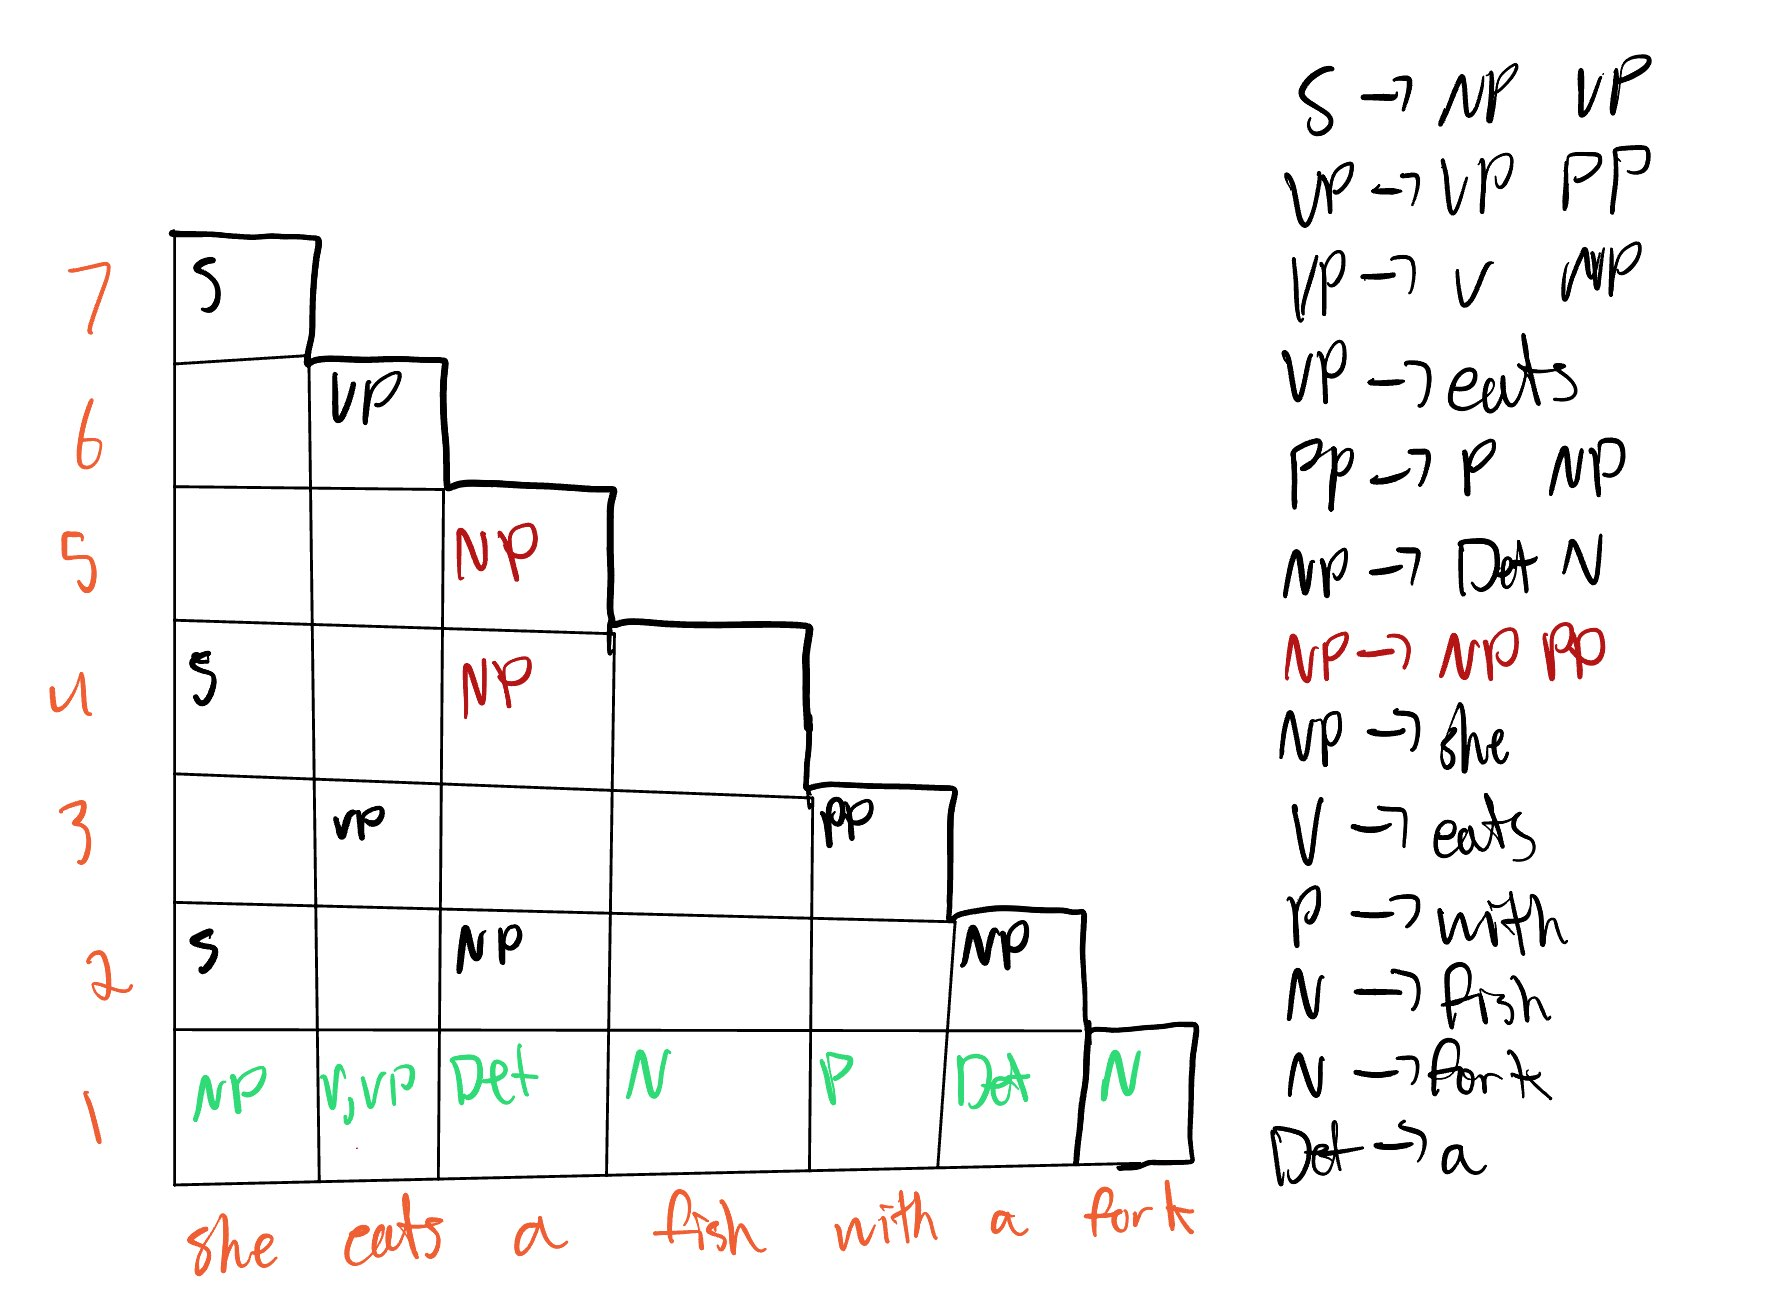

Q3 (4?)

S → B C  
B → b  
C → A B  
A → a  
B → C C  
C → a  
C → b

## CYK parser (`nltk` package)

Chart parsing using a CYK parser is available, for example, through `nltk`.

In [1]:
import nltk
from nltk import Nonterminal, nonterminals, Production, CFG

The rest is pretty straightforward. First, we run `nltk.CFG.fromstring` that forms a CFG based on its string representation.

In [2]:
groucho_grammar = nltk.CFG.fromstring("""
    S -> NP VP
    PP -> P NP
    NP -> Det N | Det N PP | 'I'
    VP -> V NP | VP PP
    Det -> 'an' | 'my'
    N -> 'elephant' | 'pajamas'
    V -> 'shot'
    P -> 'in'
    """)

print(groucho_grammar)

Grammar with 13 productions (start state = S)
    S -> NP VP
    PP -> P NP
    NP -> Det N
    NP -> Det N PP
    NP -> 'I'
    VP -> V NP
    VP -> VP PP
    Det -> 'an'
    Det -> 'my'
    N -> 'elephant'
    N -> 'pajamas'
    V -> 'shot'
    P -> 'in'


Then, let us try to assign two parses to the sentence _I shot an elephant in my pajamas:_
  * I shot \[\[an elephant\] in my pajamas\]\];
  * I shot \[an elephant\] \[in my pajamas\].
  
The class of `nltk.ChartParser` is initialized based on the given grammar. We can use the parser's method `parse` in otdr to parse a sentence. Notice, that the chart parser implemented in `nltk` supports rules with more than $2$ symbols on the right-hand side.

In [10]:
sent = ['I', 'shot', 'an', 'elephant', 'in', 'my', 'pajamas']
parser = nltk.ChartParser(groucho_grammar)
for tree in parser.parse(sent):
    print(tree)

(S
  (NP I)
  (VP
    (VP (V shot) (NP (Det an) (N elephant)))
    (PP (P in) (NP (Det my) (N pajamas)))))
(S
  (NP I)
  (VP
    (V shot)
    (NP (Det an) (N elephant) (PP (P in) (NP (Det my) (N pajamas))))))


Indeed, the parser finds both parses for the given sentence. (The example is taken from [here](https://www.nltk.org/book/ch08.html)). To explore more parsers provided by `nltk`, click [here](http://www.nltk.org/howto/parse.html).

### Question 4

Consider the following complex grammar, and test it on a sentence of your choice, as done above with the groucho_grammar.


In [4]:
complex_grammar = nltk.CFG.fromstring("""
S -> NP VP | PN VP | Pro VP
NP -> Det NP | NP PP | A NP | A N | 'movies' | 'nobody'
VP -> V NP | V PN | VP PP | 'slept' | 'snored'
PP -> P NP | P PN
Det -> 'a' | 'an' | 'the' | 'this' | 'my'
N -> 'person' | 'hill' | 'telescope' | 'movie'
Pro -> 'I' | 'you'
PN -> 'Arnold'
V -> 'saw' | 'watched'
P -> 'in' | 'on' | 'with'
A -> 'old' | 'cool' | 'young'
""")

In [13]:
#you can add your code here
# mysent = ['I', 'watched', 'a', 'cool', 'movie', 'with', 'the', 'old', 'person', 'on', 'the', 'hill'] was this too long? it was not printing
mysent = ['I', 'watched', 'a', 'cool', 'movie', 'with', 'an', 'old', 'person']
myparser = nltk.ChartParser(complex_grammar)
for tree in myparser.parse(mysent):
    print(tree)

(S
  (Pro I)
  (VP
    (VP (V watched) (NP (Det a) (NP (A cool) (N movie))))
    (PP (P with) (NP (Det an) (NP (A old) (N person))))))
(S
  (Pro I)
  (VP
    (V watched)
    (NP
      (NP (Det a) (NP (A cool) (N movie)))
      (PP (P with) (NP (Det an) (NP (A old) (N person)))))))
(S
  (Pro I)
  (VP
    (V watched)
    (NP
      (Det a)
      (NP
        (NP (A cool) (N movie))
        (PP (P with) (NP (Det an) (NP (A old) (N person))))))))


## Big O notation

If we have several algorithms that solve the same task or similar tasks, we need to be able to _compare_ these algorithms. One of the ways to do this is to **compare the speed** of those algorithms: namely, given the worst possible scenario (let's say, all input sentences are garden-path), how long will it take the algorithm to return some value depending on the size of the input. The performance of the algorithm is then _the function of the input size_. 

The **Big O** notation, usually denoted as  $\mathcal{O}(\cdot)$, expresses the worst-case complexity of a function or an algorithm.
For example, the worst-case complexity of the CYK parser is $\mathcal{O}(n^3\cdot |\mathcal{G}|)$, wher $n$ is the length of the string that needs to be parsed, and $|\mathcal{G}|$ is the number of the rules in the grammar. The performance is measured in the _order of the number of operations that the algorithm needs to perform_.

For simplicity, imagine that we are dealing with the grammar of the $n$.
In this case, the complexity of the algorithm is $\mathcal{O}(n^4)$. It roughly corresponds to the following code:

    for a in range(n):
        for b in range(n):
            for c in range(n):
                for d in range(n):
                    ...

Not the exact number of operations, but rather the **order of that number** matters for the Big O notation.

  * \[Rule 1\] **constants don't matter**.
     * $\mathcal{O}(7\cdot n^4)$ = $\mathcal{O}(9482\cdot n^4)$ = $\mathcal{O}(n^4)$.
  * \[Rule 2\] **lower complexity terms don't matter**.
     * $\mathcal{O}(n^4 + n^3 + n^2)$ = $\mathcal{O}(n^4)$;
     * $\mathcal{O}(n + n\cdot \textrm{log}(n))$ = $\mathcal{O}(n\cdot \textrm{log}(n))$.

Let's compare the growth of functions $f(n) = n$ and $f(n) = n \cdot \textrm{log}(n)$ using [Desmos graphing calculator](https://www.desmos.com/calculator).

<img src="graph.png" width="700">

While $f(n) = n \cdot \textrm{log}(n)$ starts slower than $f(n) = n$, it then "accelerates" and its values get larger and larger.
It means, that for very small values of $n$ (e.g. extremely short sentences), the algorithm that works in $\mathcal{O}(n)$ is faster, but if the inputs get longer, the $\mathcal{O}(n \cdot \textrm{log}(n))$ one becomes much faster.

### Question 5

Which worst-case complexity is better?
  * $\mathcal{O}(n^2)$ or $\mathcal{O}(n!)$;
  * $\mathcal{O}(n^4)$ or $\mathcal{O}(n!)$;
  * $\mathcal{O}(\sqrt{n})$ or $\mathcal{O}(\log{n})$?

*You can add your answer here*

1. $\mathcal{O}(n^2)$ when n = 10, n^2 = 100 vs 3,628,800
2. $\mathcal{O}(n^4)$ n = 10, it is 10,000 vs 3,628,800
3. $\mathcal{O}(\log n)$ when n = 1,000,000, sqrt(n) = 1000 vs 20
